# a

In [1]:
import time

import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse.linalg import cg

In [2]:
def conjugate_gradient_method(
    A_mat: np.ndarray, b_vec: np.ndarray, x_vec: np.ndarray, epsilon: np.float64
) -> tuple[np.ndarray, int]:
    """Implement of the alg 6.8 in the notes."""
    r = b_vec - A_mat @ x_vec
    p = r.copy()
    k = 0
    while np.linalg.norm(r) > epsilon:
        k += 1
        s = A_mat @ p
        v = (r.T @ r) / (p.T @ s)
        x_vec = x_vec + v * p
        r_old = r.copy()
        r = r - v * s
        mu = (r.T @ r) / (r_old.T @ r_old)
        p = r + mu * p

    return x_vec, k

In [3]:
def gen_A(n: int) -> np.ndarray:
    """Generate the matrix A of the linear system of equations Au=b."""
    n = n - 1
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 2
        if i > 0:
            A[i, i - 1] = -1
        if i < n - 1:
            A[i, i + 1] = -1
    return A * ((n + 1) ** 2)


gen_A(5)

array([[ 50., -25.,   0.,   0.],
       [-25.,  50., -25.,   0.],
       [  0., -25.,  50., -25.],
       [  0.,   0., -25.,  50.]])

In [4]:
def gen_b(n: int) -> np.ndarray:
    """Generate the vector b of the linear system of equations Au=b."""
    b = np.zeros(n - 1)
    h = np.float64(1 / n)

    def f(x: np.float64) -> np.float64:
        """The function f in the linear system of equations Au=p."""
        return -6 * np.pi * np.cos(3 * np.pi * x) + 9 * np.pi**2 * x * np.sin(
            3 * np.pi * x
        )

    for i in range(n - 1):
        b[i] = f((i + 1) * h)
    return b.reshape(-1, 1)


gen_b(5)

array([[ 22.72062596],
       [ -5.63473741],
       [-46.57613381],
       [ 61.75833825]])

'n = 8, k = 4'

'n = 16, k = 8'

'n = 32, k = 16'

'n = 64, k = 32'

'n = 128, k = 64'

'n = 256, k = 128'

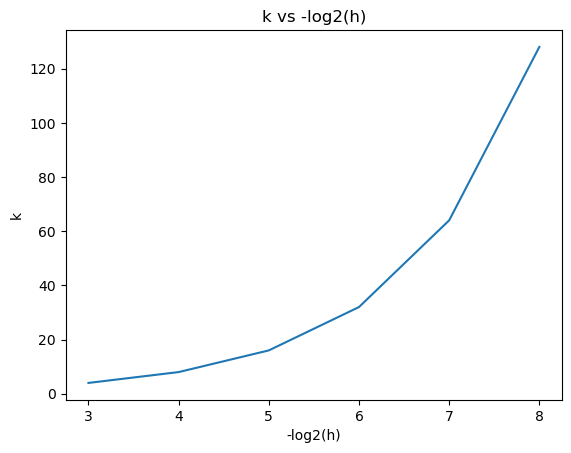

In [5]:
n = [8, 16, 32, 64, 128, 256]
k_ls = []
for i in n:
    A = gen_A(i)
    b = gen_b(i)
    x = np.zeros((i - 1, 1))
    x, k = conjugate_gradient_method(A, b, x, 1e-10)
    display(f"n = {i}, k = {k}")
    k_ls.append(k)

plt.plot(np.log2(n), k_ls)
plt.xlabel("-log2(h)")
plt.ylabel("k")
plt.title("k vs -log2(h)")
plt.savefig("sheet09_3_a.svg")

In [6]:
def scipy_cg(
    A_mat: np.ndarray, b_vec: np.ndarray, x_vec: np.ndarray, epsilon: np.float64
) -> tuple[np.ndarray, int]:
    """Decorat the scipy cg function to count the number of iterations."""
    iter_count = 1

    def callback(_: np.ndarray) -> None:
        nonlocal iter_count
        iter_count += 1

    x, _ = cg(A_mat, b_vec, x0=x_vec, rtol=epsilon)
    return x, iter_count

In [7]:
n = [8, 16, 32, 64, 128, 256]
for i in n:
    A = gen_A(i)
    b = gen_b(i)
    x = np.zeros((i - 1, 1))
    x, k = scipy_cg(A, b, x, 1e-10)
    display(f"n = {i}, k = {k}")

'n = 8, k = 1'

'n = 16, k = 1'

'n = 32, k = 1'

'n = 64, k = 1'

'n = 128, k = 1'

'n = 256, k = 1'

# c

In [8]:
def benchmark(func: callable, iters: int = 1000) -> float:
    """The benchmark function to measure the runtime of the function."""
    start = time.time()
    for _ in range(iters):
        n = [8, 16, 32, 64, 128, 256]
        for i in n:
            A = gen_A(i)
            b = gen_b(i)
            x = np.zeros((i - 1, 1))
            func(A, b, x, 1e-10)
    end = time.time()
    return end - start

In [9]:
time_cg = benchmark(conjugate_gradient_method)
time_scipy_cg = benchmark(scipy_cg)
display(f"conjugate_gradient_method: {time_cg}")
display(f"scipy_cg: {time_scipy_cg}")

'conjugate_gradient_method: 32.597339391708374'

'scipy_cg: 25.366512775421143'